In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [2]:
familiesaggregated = pd.read_csv("data/FamiliesAggregated.csv", low_memory=False)

In [3]:
familyipc = pd.read_csv("data/FamilyIPC.csv", low_memory=False)

In [4]:
familycitations = pd.read_csv("data/FamilyCitations.csv", low_memory=False)

In [10]:
familyipc
ipcs = familyipc["IPC"]
# Фильтруем IPCs, оставляя часть (в данном случае до дефиса)
ipcs = ipcs.str.split("-").str[0]

<Axes: xlabel='IPC'>

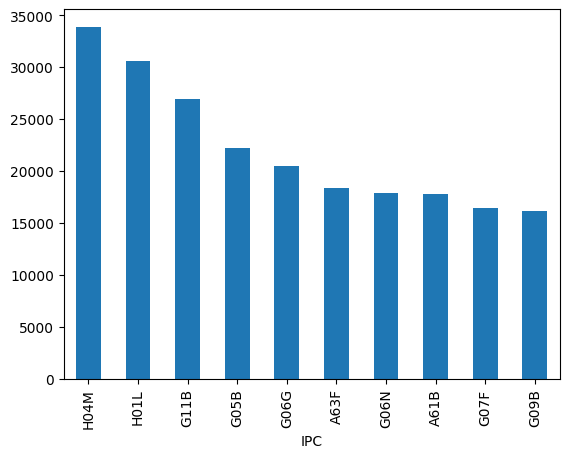

In [11]:
# Посмотрим как распределены патентные классы
counts = ipcs.value_counts()
sorted_counts = counts.sort_values(ascending=False)
sc = sorted_counts[sorted_counts > 1000]
# show bar chart
sc[8:18].plot.bar()

In [12]:
# H04M - Телефонная связь
# H01L - Полупроводниковые приборы; электрические приборы на твердом теле, не отнесенные к другим классам или подклассам 2
# G11B - Накопление информации, основанное на относительном перемещении носителя записи и преобразователя
# G05B - Регулирующие и управляющие системы общего назначения; функциональные элементы таких систем; устройства для контроля или испытания таких систем или элементов

# H04M - Telephonic communication
# H01L - Semiconductor devices; Electric solid state devices not otherwise provided for
# G11B - Information storage based on relative movement between record carrier and transducer
# G05B - Control or regulating systems in general; Functional elements of such systems; Monitoring or testing arrangements for such systems or elements

classes = ["H04M", "H01L", "G11B", "G05B"]

In [13]:
patents_all = []
for c in classes:
    # Выбираем все группы агрегации, которые соответствуют классу
    gas = familyipc[familyipc["IPC"].str.startswith(c)]["GA"].unique().astype(str)
    # Выбираем все патенты, которые соответствуют группам агрегации
    patents = familiesaggregated[familiesaggregated["GA"].isin(gas)]
    # Добавляем класс
    patents["IPC"] = c
    # Добавляем в список
    patents_all.append(patents)
# Соединяем все списки в один
patents_uf = pd.concat(patents_all)
# Удаляем дубликаты по GA (один патент может принадлежать нескольким классам, но в данном
# случае мы не хотим дублировать патенты)
patents_uf = patents_uf.drop_duplicates(subset="GA")

D:\_TEMP\ipykernel_17032\2377872591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patents["IPC"] = c
D:\_TEMP\ipykernel_17032\2377872591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patents["IPC"] = c
D:\_TEMP\ipykernel_17032\2377872591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [14]:
# Делаем так, чтобы в каждом классе было одинаковое количество патентов (выбираем случайные патенты)
min_count = patents_uf["IPC"].value_counts().min()
patents = patents_uf.groupby("IPC").apply(lambda x: x.sample(min_count, random_state=10))
patents = patents.reset_index(drop=True)
patents["IPC"].value_counts()

IPC
G05B    10682
G11B    10682
H01L    10682
H04M    10682
Name: count, dtype: int64

In [15]:
patents.to_csv("patents.csv", index=False)